# Recognising Traffic Signs With 98% Accuracy Using Deep Learning

#### Eiki Luis Yamashiro | Engenharia de Computação - Insper

### Sobre o Artigo

Esse notebook é uma reaplicação do artigo de Eddie Forson, publicado no site towardsdatascience em agosto de 2017. O paper está disponível em https://towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab.

### Sobre o Dataset

- O Banco de Dados utilizado no artigo possui dados do German Traffic Sign Detection Benchmark (GTSDB), o arquivo contém o conjunto de dados utilizado durante a competição IJCNN 2013.

- O arquivo FUllIJCNN2013.zip inclui 900 imagens de treino de dimensões 1360 x 800 pixels.


O shape das imagens foram reajustados para 32 x 32 pixels, porém podemos notar no gráfico abaixo de distribuição de dimensões que há uma tendência nas imagens possuirem uma dimensão com largura e comprimento semelhantes. Dessa forma, é possível realizar o resize evitando grandes deformações que podem retirar características importantes para a identificação da placa.

![](shape_image.png)

In [33]:
IMG_SIZE_X = 32
IMG_SIZE_Y = 32

### Tratamento dos Dados

In [34]:
import pandas as pd
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print("TensorFlow Version: ", tf.__version__)
print("TensorFlow is GPU Available: ", tf.test.is_gpu_available())

TensorFlow Version:  2.9.1
TensorFlow is GPU Available:  False


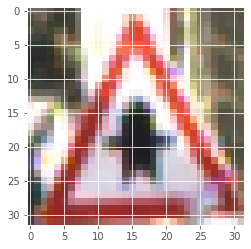

In [35]:
def crop_image(path, cords, resized=True):
    x1,y1,x2,y2 = cords
    tmp = cv2.imread(path)
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    tmp = tmp[y1:y2,x1:x2]
    
    resized = cv2.resize(tmp, (32,32), interpolation = cv2.INTER_AREA)
    
    # return tmp
    return resized 

img = crop_image("FullIJCNN2013/00000.ppm",(774,411,815,446))
plt.imshow(img)

In [4]:
gt = open("gt.txt", 'r').read().split('\n')
x = []
y = []
for line_str in gt:
    ls = line_str.split(';')
    path = f"FullIJCNN2013/{ls[0]}"
    cords = (int(ls[1]), int(ls[2]), int(ls[3]), int(ls[4]))
    img = crop_image(path, cords)
    x.append(img)
    y.append(int(ls[5]))
x = np.asarray(x)
y = np.asarray(y)

In [5]:
signnames = pd.read_csv("CarND-Traffic-Sign-Classifier-Project/signnames.csv")
signnames.ClassId.describe()

count    43.000000
mean     21.000000
std      12.556539
min       0.000000
25%      10.500000
50%      21.000000
75%      31.500000
max      42.000000
Name: ClassId, dtype: float64

In [6]:
signnames.loc[0].SignName

'Speed limit (20km/h)'

In [7]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=404)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
INPUT_SHAPE = X_train[0].shape

X_train shape:  (766, 32, 32, 3)
y_train shape:  (766,)
X_test shape:  (86, 32, 32, 3)
y_test shape:  (86,)


### Construção do Modelo

In [9]:
from keras import layers
import keras

In [52]:
LeNet5 = keras.Sequential()

LeNet5.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
LeNet5.add(layers.AveragePooling2D())

LeNet5.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
LeNet5.add(layers.AveragePooling2D())

LeNet5.add(layers.Flatten())

LeNet5.add(layers.Dense(120, activation='relu'))

LeNet5.add(layers.Dense(84, activation='relu'))

LeNet5.add(layers.Dense(43, activation = 'softmax'))

LeNet5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 6)         168       
                                                                 
 average_pooling2d_6 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

In [53]:
LeNet5.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [50]:
EPOCHS = 40
BATCH_SIZE = 128

In [54]:
history = LeNet5.fit(X_train, y_train, epochs = 20, validation_split = 0.2, batch_size=4)
LeNet5.save("LeNet5.model")

Epoch 1/20
153/153 [==============================] - 1s 6ms/step - loss: 5.7186 - accuracy: 0.2484 - val_loss: 2.4512 - val_accuracy: 0.4221
Epoch 2/20
153/153 [==============================] - 1s 4ms/step - loss: 2.0093 - accuracy: 0.4967 - val_loss: 1.8534 - val_accuracy: 0.5649
Epoch 3/20
153/153 [==============================] - 1s 6ms/step - loss: 1.4075 - accuracy: 0.6209 - val_loss: 1.4836 - val_accuracy: 0.6364
Epoch 4/20
153/153 [==============================] - 1s 6ms/step - loss: 1.0411 - accuracy: 0.7320 - val_loss: 1.3091 - val_accuracy: 0.6818
Epoch 5/20
153/153 [==============================] - 1s 6ms/step - loss: 0.6381 - accuracy: 0.8284 - val_loss: 1.3674 - val_accuracy: 0.7208
Epoch 6/20
153/153 [==============================] - 1s 6ms/step - loss: 0.4734 - accuracy: 0.8709 - val_loss: 1.1296 - val_accuracy: 0.8052
Epoch 7/20
153/153 [==============================] - 1s 5ms/step - loss: 0.2852 - accuracy: 0.9183 - val_loss: 1.0314 - val_accuracy: 0.8182
Epoch 

INFO:tensorflow:Assets written to: LeNet5.model/assets


INFO:tensorflow:Assets written to: LeNet5.model/assets


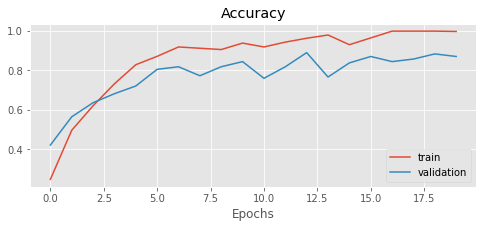

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.show()

In [15]:
LeNet5.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 2.8078 - accuracy: 0.8488


[2.8078055381774902, 0.8488371968269348]

### Dataset - Pare (Sinalização Brasileira)

In [16]:
x = []
y = []
path = "traffic-signs-database/datasets/augmented-dataset/pare/"
for img_path in os.listdir(path):
    img = cv2.imread(path+img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
    x.append(resized)
    y.append(43)
    
x = np.asarray(x)
y = np.asarray(y)

### Transfer Learning

In [61]:
focused_signs = {
    "proibido_virar_a_direita": 0,
    "proibido_virar_a_esquerda": 1,
    "pare": 2,
    "velocidade_maxima_40_km": 3,
    "velocidade_maxima_60_km": 4
}

x = []
y = []

for sign in focused_signs:
    path = f"traffic-signs-database/datasets/augmented-dataset/{sign}/"
    for img_path in os.listdir(path):
        img = cv2.imread(path+img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
        resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
        x.append(resized)
        y.append(focused_signs[sign])

x = np.asarray(x)
y = np.asarray(y)

In [62]:
x.shape

(776, 32, 32, 3)

In [63]:
model = tf.keras.models.load_model("LeNet5.model")

new_model = keras.Sequential()

for layer in model.layers[:-1]:
    layer.trainable = False
    new_model.add(layer)
    
new_model.add(layers.Dense(5, activation = 'softmax'))
new_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history = new_model.fit(x, y, epochs = 40, validation_split = 0.1, batch_size=2)

Epoch 1/40
349/349 [==============================] - 1s 2ms/step - loss: 3.4053 - accuracy: 0.3926 - val_loss: 2.3416 - val_accuracy: 0.5128
Epoch 2/40
349/349 [==============================] - 1s 2ms/step - loss: 1.3218 - accuracy: 0.6476 - val_loss: 1.1807 - val_accuracy: 0.6410
Epoch 3/40
349/349 [==============================] - 1s 2ms/step - loss: 0.8737 - accuracy: 0.7493 - val_loss: 1.5078 - val_accuracy: 0.5385
Epoch 4/40
349/349 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.7908 - val_loss: 1.2480 - val_accuracy: 0.6538
Epoch 5/40
349/349 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.8066 - val_loss: 1.0400 - val_accuracy: 0.6923
Epoch 6/40
349/349 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.8381 - val_loss: 0.5674 - val_accuracy: 0.8205
Epoch 7/40
349/349 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8682 - val_loss: 0.9243 - val_accuracy: 0.7436
Epoch 

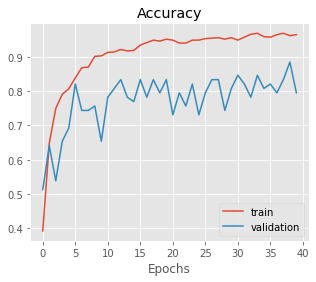

In [67]:
plt.style.use('ggplot')
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.show()

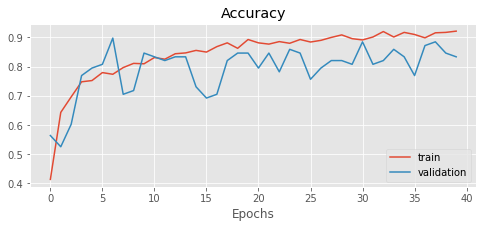

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.show()

In [68]:
new_model.save("LeNet5_BRA.model")

INFO:tensorflow:Assets written to: LeNet5_BRA.model/assets


INFO:tensorflow:Assets written to: LeNet5_BRA.model/assets


In [70]:
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image 
from keras.preprocessing import image

focused_signs = {
    "proibido_virar_a_direita": 0,
    "proibido_virar_a_esquerda": 1,
    "pare": 2,
    "velocidade_maxima_40_km": 3,
    "velocidade_maxima_60_km": 4
}

image_x, image_y = 32,32


classifier = load_model("LeNet5_BRA.model")
    
cam = cv2.VideoCapture(0)

img_counter = 0

img_text = ['','']
while True:
    ret, frame = cam.read()
    img = cv2.rectangle(frame, (0,320),(0,320), (0,255,0), thickness=2, lineType=8, shift=0)

    imcrop = img[0:320, 0:320]
        
    cv2.putText(frame, str(img_text[1]), (30, 200), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (0, 255, 0))
    cv2.imshow("Sinal", frame)
    cv2.imshow("LeNet5-BRA", imcrop)
            
    image = cv2.resize(imcrop, (image_x, image_y))
    image = np.expand_dims(image, axis = 0)
    result = classifier.predict(image)
    
    i = np.argmax(result)
    img_text = [result, list(focused_signs.keys())[i]]
        
    if cv2.waitKey(1) == 113:
        break

cam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step
